<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import taiko as tk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)

WHO = 7
SONG = 1
ORDER = 3

Using TensorFlow backend.


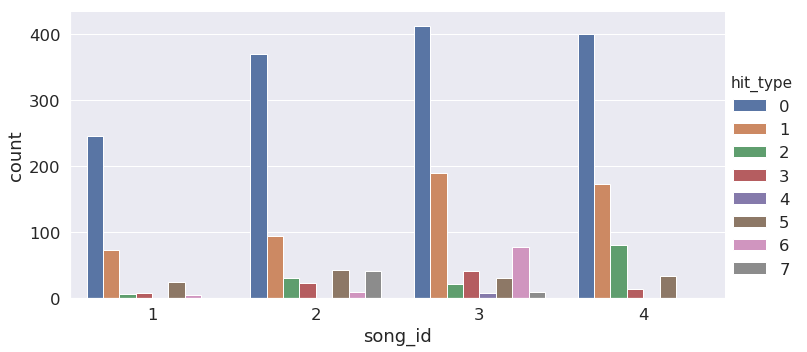

In [7]:
note_dfs = []
for song in range(4):
    df = tk.get_event_primitive_df(WHO, song + 1, ORDER)
    df['song_id'] = song + 1
    note_dfs.append(df)

note_df = pd.concat(note_dfs, ignore_index=True)
sns.catplot(x='song_id', kind='count', hue='hit_type', aspect=2, data=note_df)
plt.show()

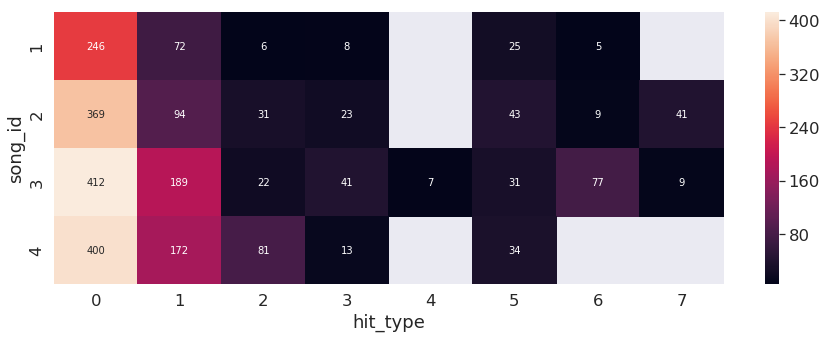

In [3]:
hit_df = note_df.copy()
hit_df['count'] = hit_df.groupby(['hit_type', 'song_id'])['hit_type'].transform('count')
hit_df = hit_df[['hit_type', 'song_id', 'count']].drop_duplicates(['hit_type', 'song_id'])
pivot_df = hit_df.pivot("song_id", "hit_type", "count")
plt.figure(figsize=(15, 5))
sns.heatmap(pivot_df, annot=True, fmt=".0f")
plt.show()

In [4]:
result_df = pd.read_csv('CSV/taiko_result.csv')
result_df['hit'] = result_df['good'] + result_df['ok']
result_df['total_hit'] = result_df['good'] + result_df['ok'] + result_df['bad']
result_df['hit_ratio'] = result_df['hit'] / result_df['total_hit']
result_df['good_ratio'] = result_df['good'] / result_df['total_hit']
result_df

,drummer_id,song_id,performance_order,score,good,ok,bad,max_combo,drumroll,hit,total_hit,hit_ratio,good_ratio
0,1,1,1,243400,74,18,2,65,67,92,94,0.978723,0.787234
1,1,1,2,223010,70,21,3,54,66,91,94,0.968085,0.744681
2,1,1,3,181870,66,25,3,45,67,91,94,0.968085,0.702128
3,1,2,1,218710,88,48,12,46,126,136,148,0.918919,0.594595
4,1,2,2,212760,94,39,15,34,123,133,148,0.898649,0.635135
5,1,2,3,217700,89,50,9,32,127,139,148,0.939189,0.601351
6,1,3,1,245790,170,79,10,54,183,249,259,0.961390,0.656371
7,1,3,2,297750,157,94,8,123,173,251,259,0.969112,0.606178
8,1,3,3,246200,157,87,15,88,176,244,259,0.942085,0.606178
9,1,4,1,124010,73,97,97,18,49,170,267,0.636704,0.273408


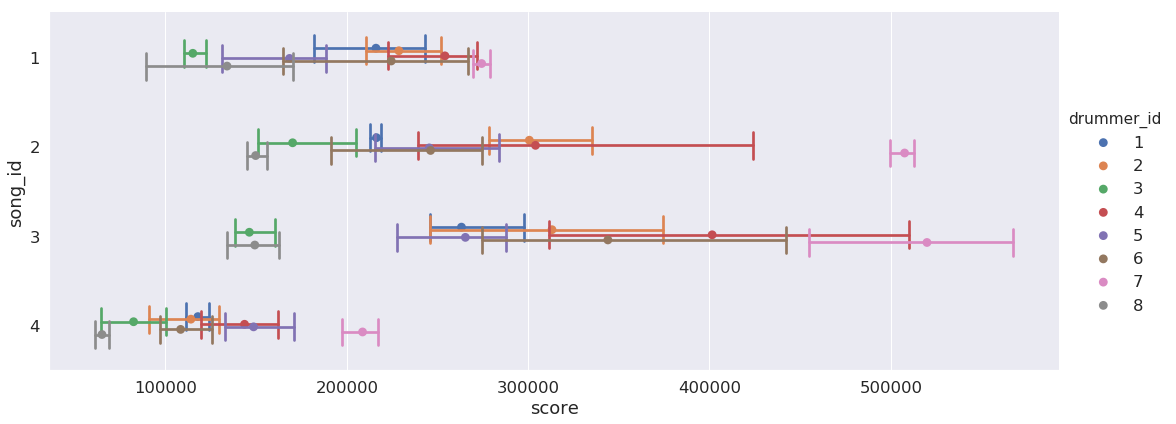

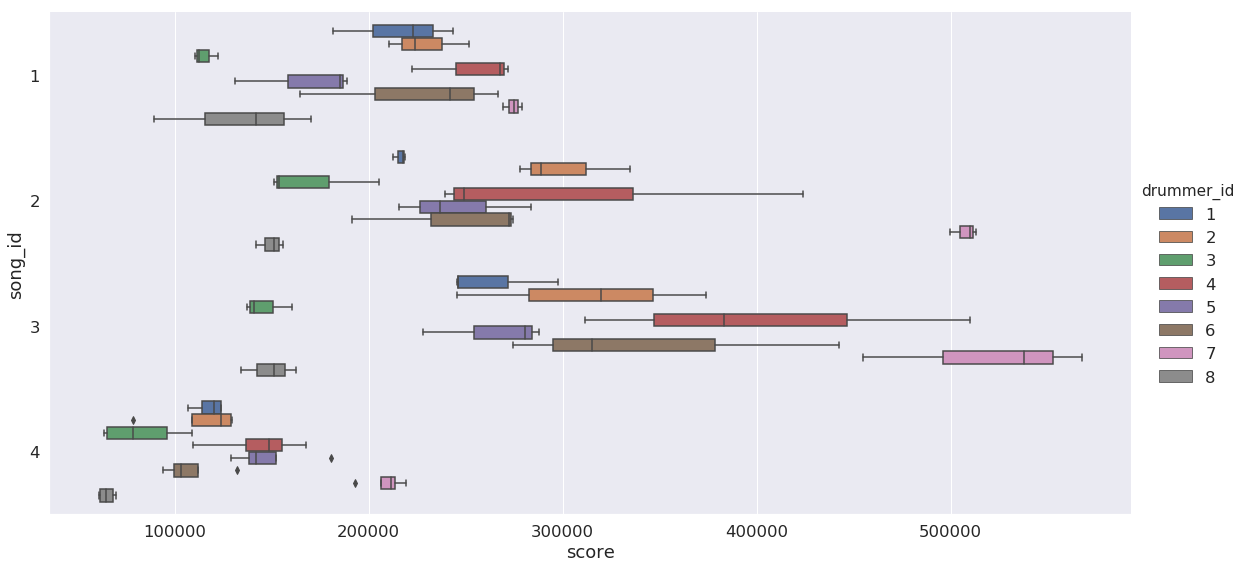

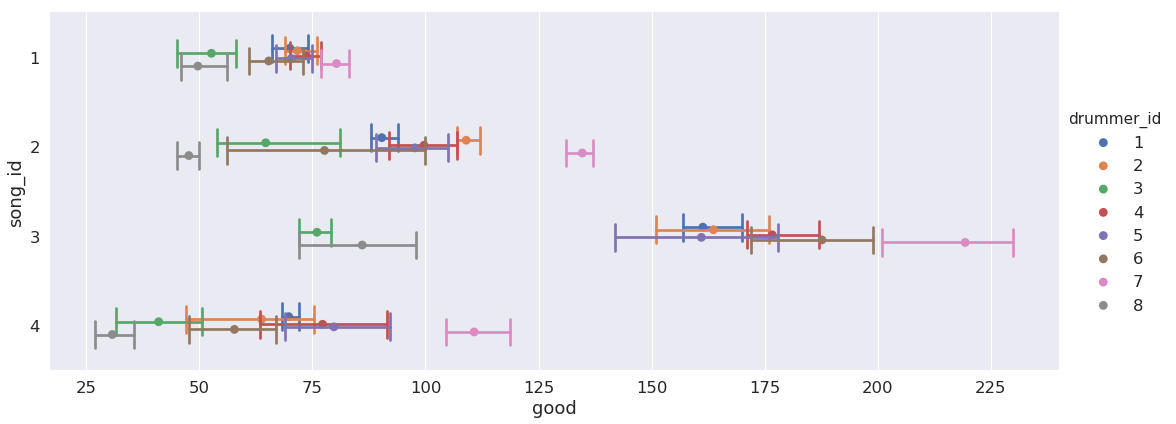

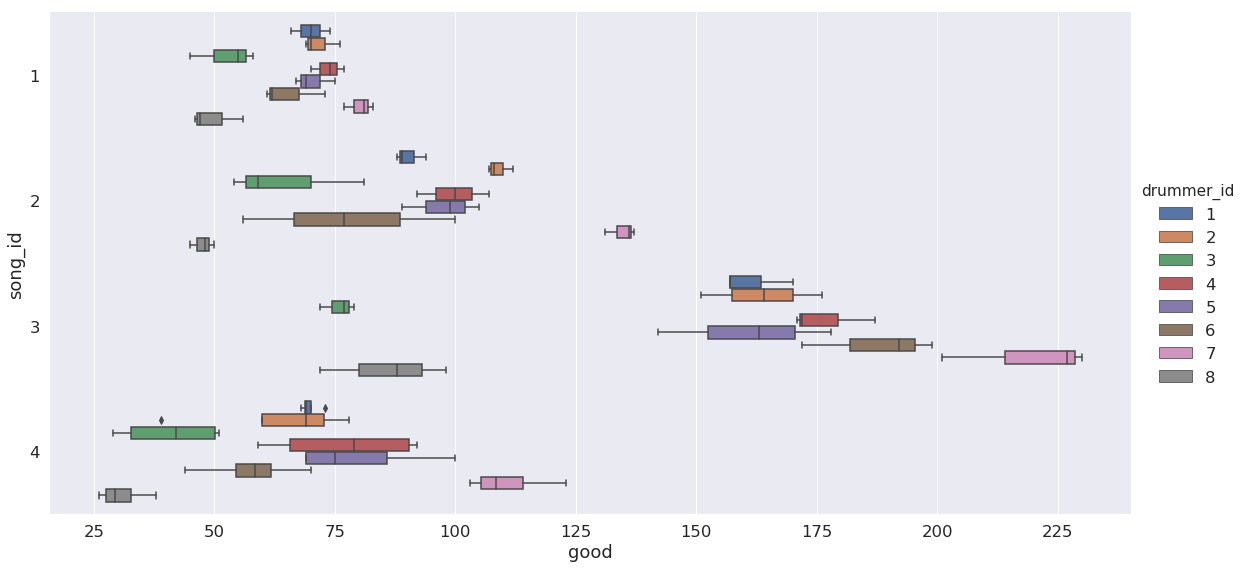

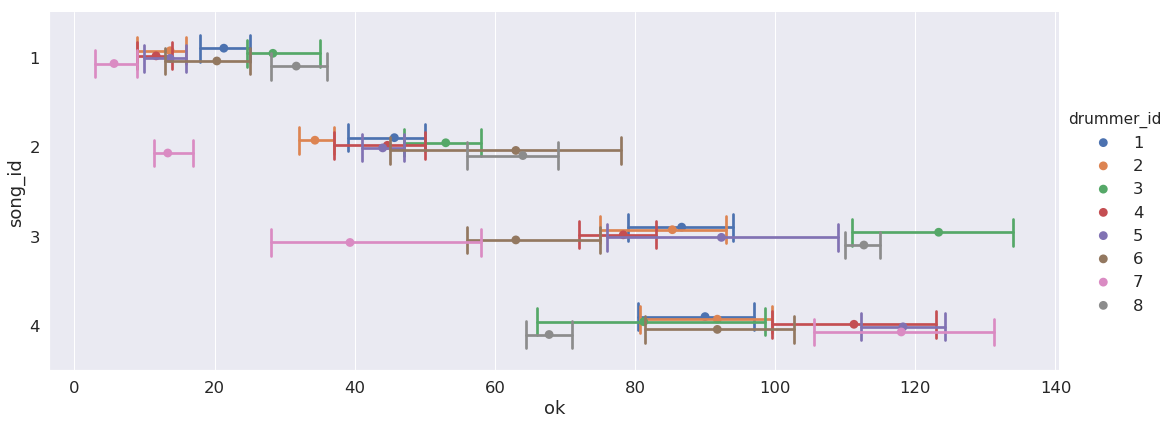

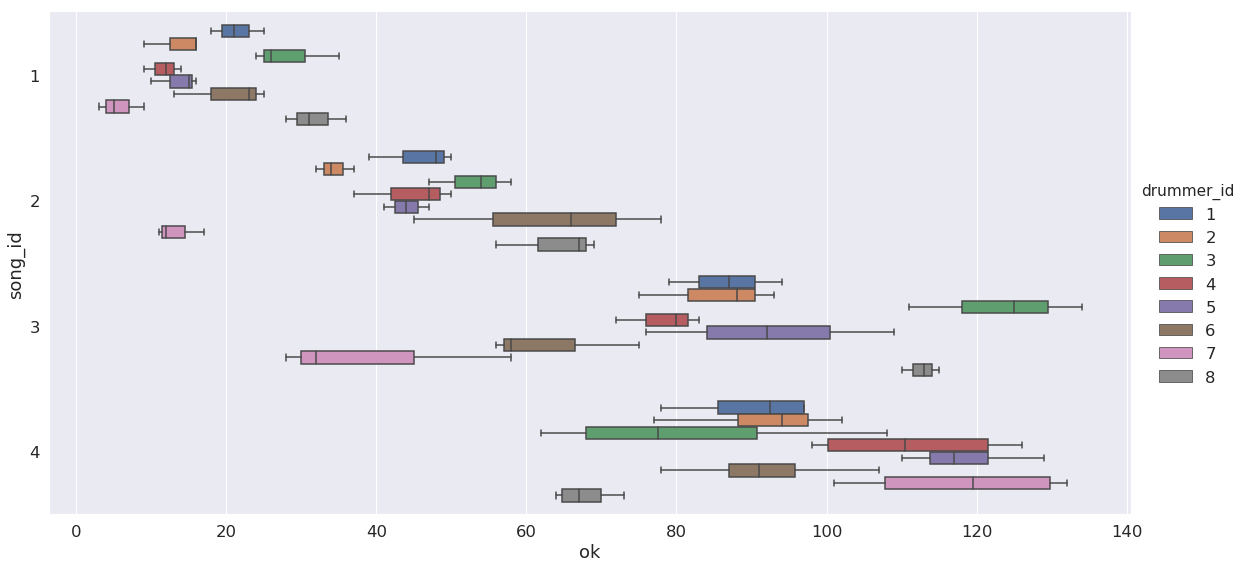

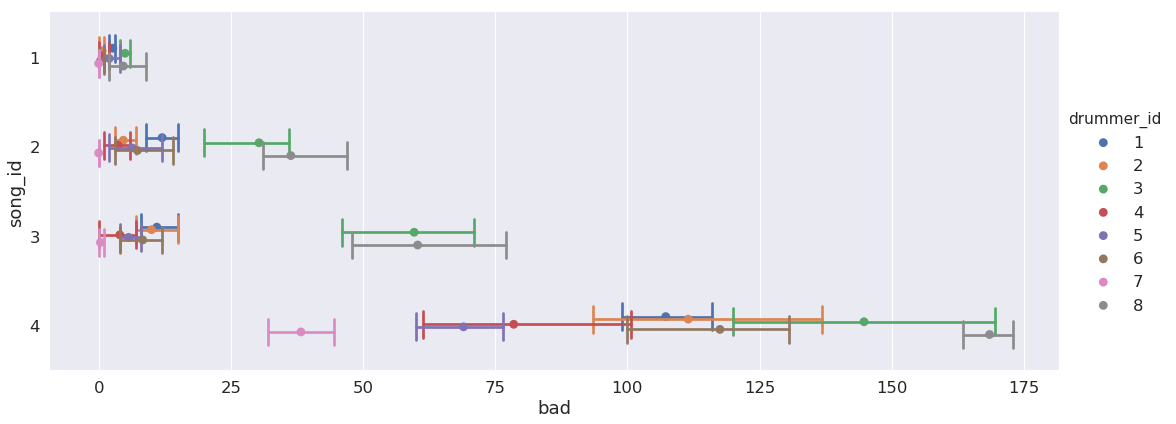

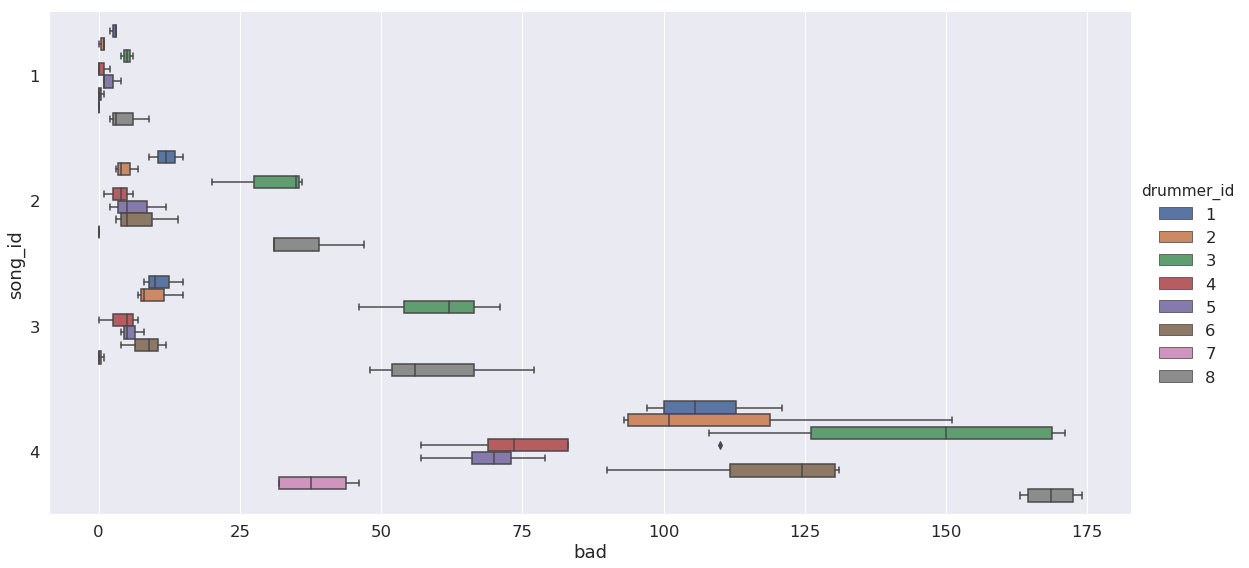

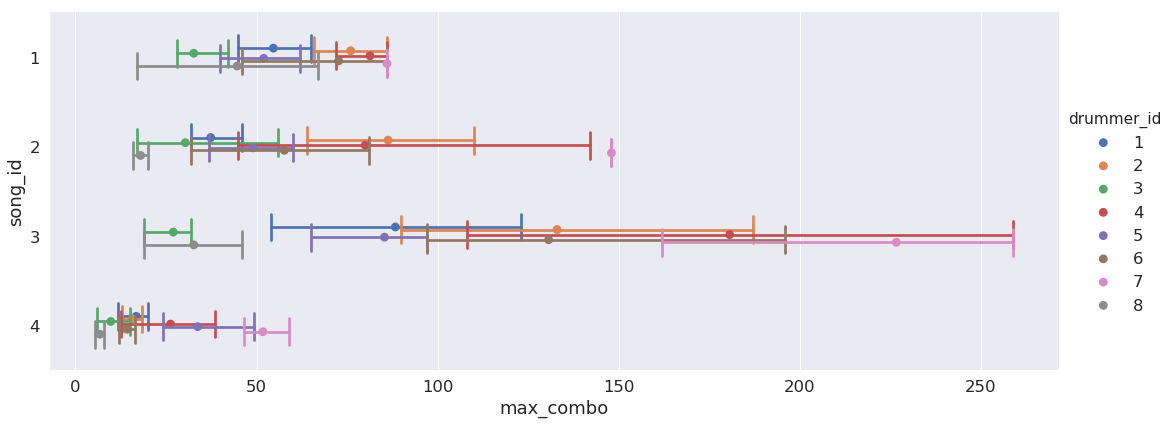

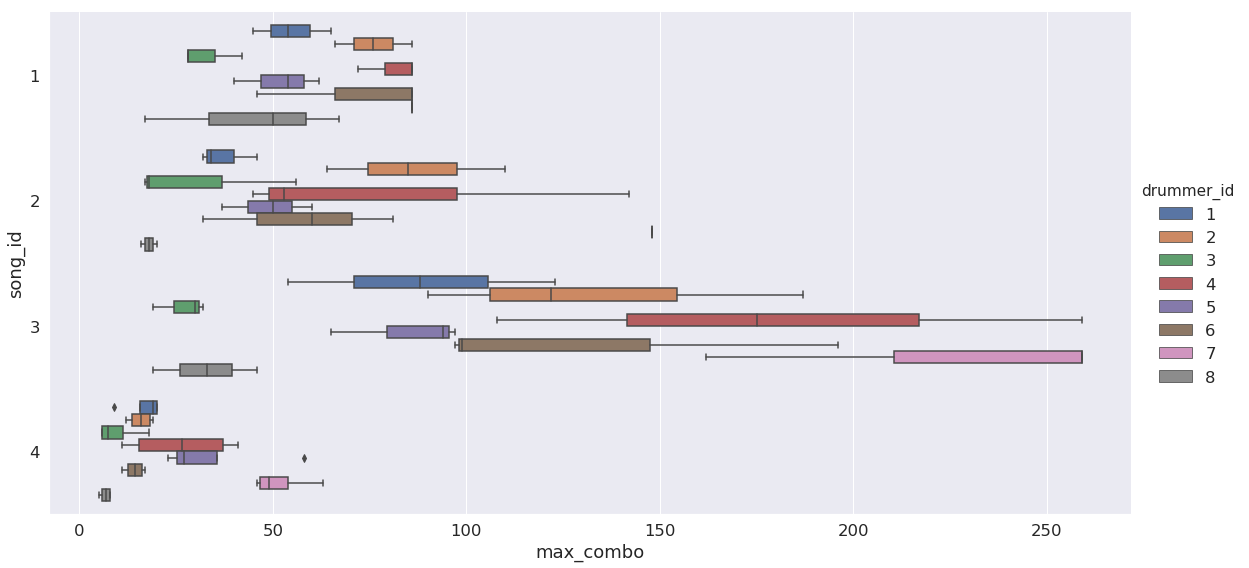

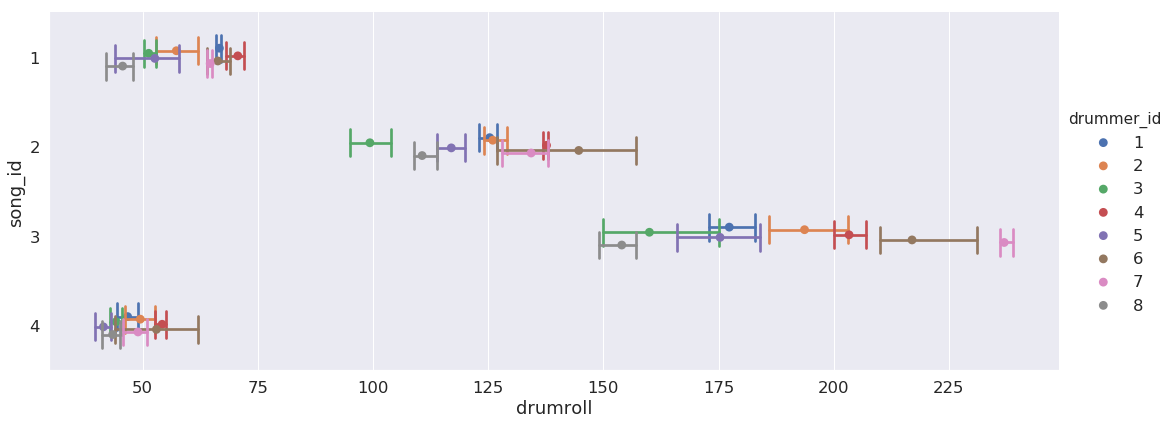

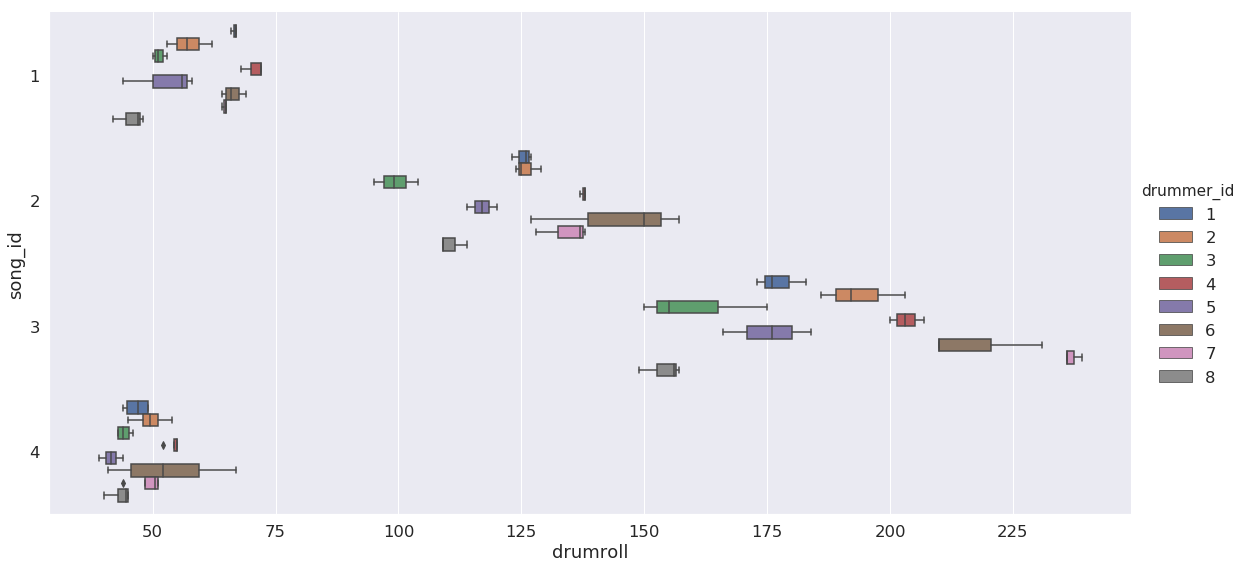

In [22]:
for col in ['score', 'good', 'ok', 'bad', 'max_combo', 'drumroll']:
    sns.catplot(y="song_id", x=col, orient='h',
                capsize=.3, aspect=2.5, height=6,
                kind="point", data=result_df, hue='drummer_id', dodge=True, join=False)
    plt.show()
#     plt.figure(figsize=(15, 8))
    sns.catplot(y="song_id", x=col, orient='h', kind='box', height=8, aspect=2, data=result_df, hue='drummer_id')
    plt.show()

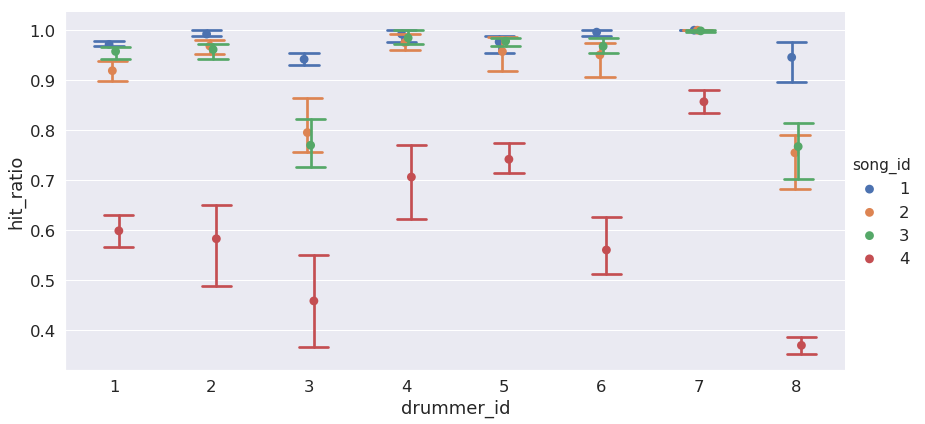

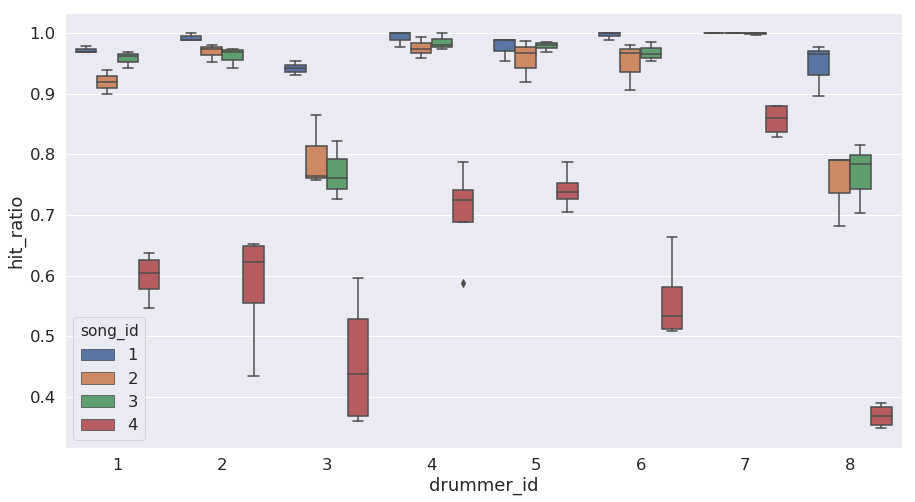

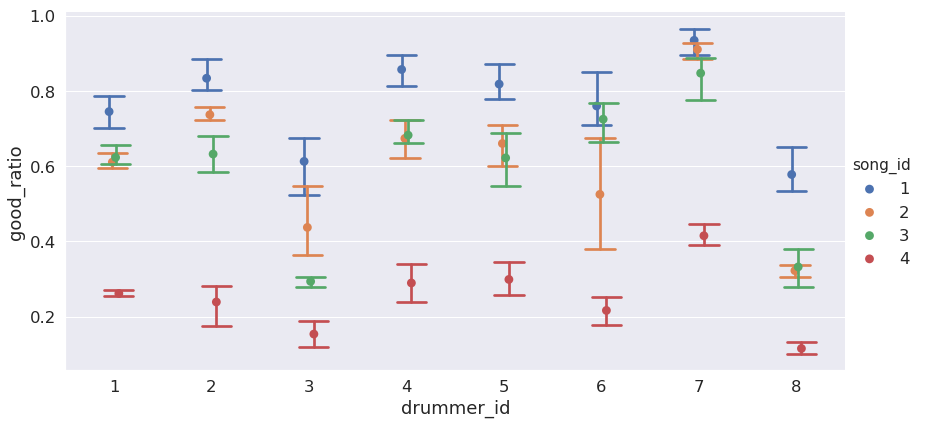

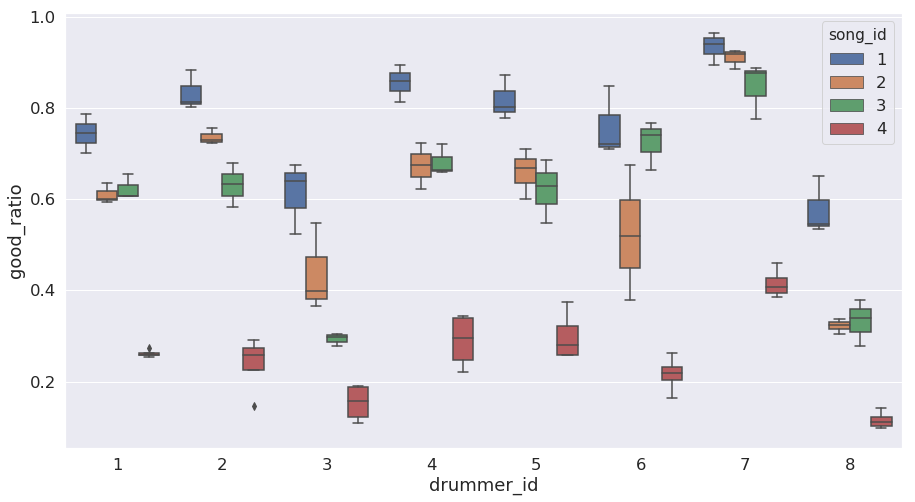

In [8]:
for col in ['hit_ratio', 'good_ratio']:
    sns.catplot(x="drummer_id", y=col,
                capsize=.3, aspect=2, height=6,
                kind="point", data=result_df, hue='song_id', dodge=True, join=False)
    plt.show()
    plt.figure(figsize=(15, 8))
    sns.boxplot(x="drummer_id", y=col, data=result_df, hue='song_id')
    plt.show()

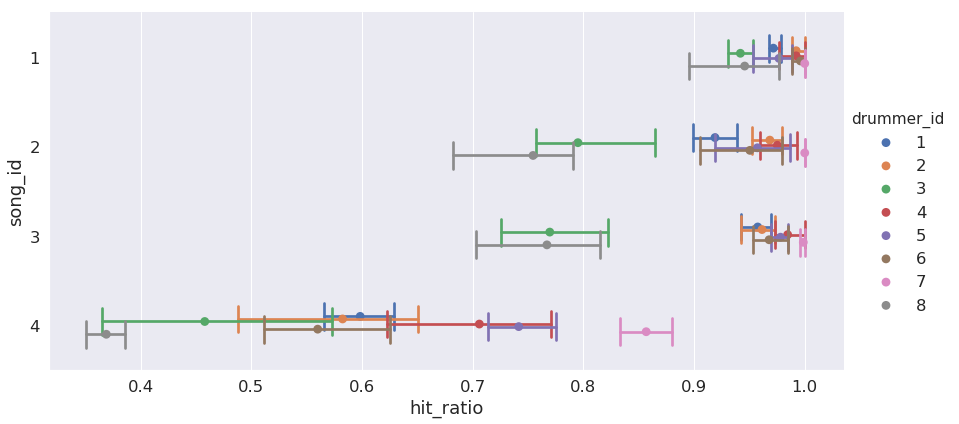

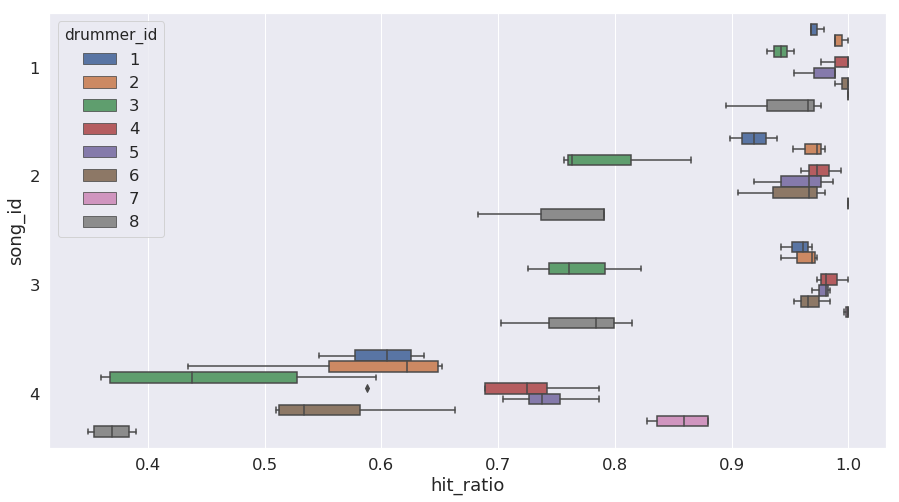

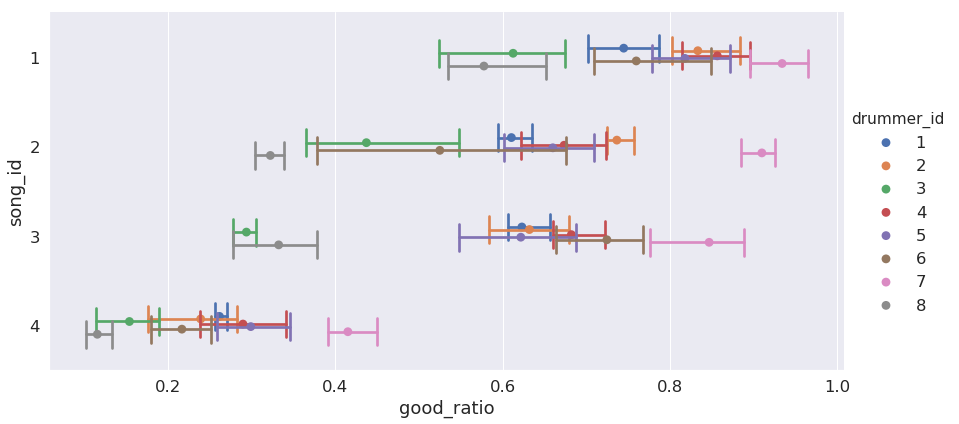

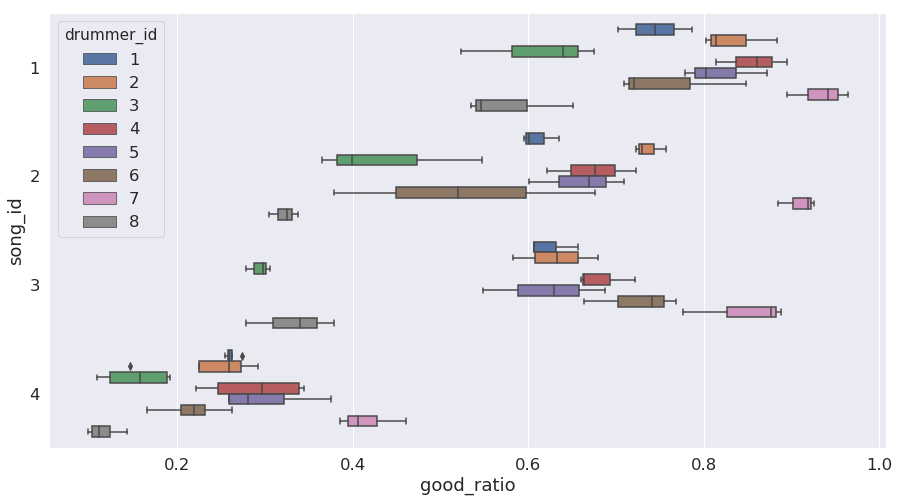

In [11]:
for col in ['hit_ratio', 'good_ratio']:
    sns.catplot(y="song_id", x=col, orient='h', 
                capsize=.3, aspect=2, height=6,
                kind="point", data=result_df, hue='drummer_id', dodge=True, join=False)
    plt.show()
    plt.figure(figsize=(15, 8))
    sns.boxplot(y="song_id", x=col, orient='h', data=result_df, hue='song_id')
    plt.show()